In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
default_style=sns.set_style("whitegrid")

In [12]:
try:
    df = pd.read_csv('Titanic.csv')  
except FileNotFoundError:
    df = sns.load_dataset('titanic')  
    df = df.rename(columns={
        'class': 'Pclass', 'survived': 'Survived',
        'sex': 'Sex', 'age': 'Age', 'fare': 'Fare'
    })
    if df['Pclass'].dtype == object:
        df['Pclass'] = df['Pclass'].map({'First':1, 'Second':2, 'Third':3})


In [13]:
df.head()
df.head()

,Survived,pclass,Sex,Age,sibsp,parch,Fare,embarked,Pclass,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# (I) frequency table task 1
freq = df['Pclass'].value_counts().sort_index()
rel_freq = df['Pclass'].value_counts(normalize=True).sort_index()
cum_freq = freq.cumsum()
cum_rel_freq = rel_freq.cumsum()


freq_table = pd.DataFrame({
    'Absolute_Freq': freq,
    'Relative_Freq': rel_freq,
    'Cumulative_Freq': cum_freq,
    'Cumulative_Relative_Freq': cum_rel_freq
})

print(freq_table)

        Absolute_Freq  Relative_Freq  Cumulative_Freq  \
First             216       0.242424              216   
Second            184       0.206510              400   
Third             491       0.551066              891   

        Cumulative_Relative_Freq  
First                   0.242424  
Second                  0.448934  
Third                   1.000000  


In [ ]:
# (II) Contigency table task 2
tab = pd.crosstab(df['Sex'], df['Survived'], margins=True)
tab


Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [ ]:
#  Joint probability table  Task 3
joint_prob = pd.crosstab(df['Sex'], df['Survived'], normalize=True)
joint_prob



Survived,0,1
Sex,,
female,0.090909,0.261504
male,0.525253,0.122334


In [22]:
#Marginal probabilities
marginal_sex = df['Sex'].value_counts(normalize=True)
marginal_survived = df['Survived'].value_counts(normalize=True)
print("P(Sex):\n", marginal_sex)
print("\nP(Survived):\n", marginal_survived)

P(Sex):
 male      0.647587
female    0.352413
Name: Sex, dtype: float64

P(Survived):
 0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [23]:
#Conditional probabilities
cond_prob = pd.crosstab(df['Sex'], df['Survived'], normalize='index')
cond_prob

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [ ]:
#(III) corelation Analysis task 4
corr_df = df[['Age', 'Fare']].dropna()


In [30]:
pearson_corr = corr_df['Age'].corr(corr_df['Fare'])
print(f"Pearson correlation between Age and Fare: {pearson_corr:.3f}")


Pearson correlation between Age and Fare: 0.096


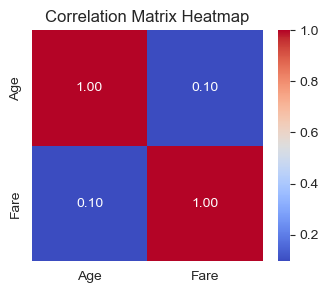

In [31]:
grm = corr_df.corr()
plt.figure(figsize=(4, 3))
sns.heatmap(grm, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


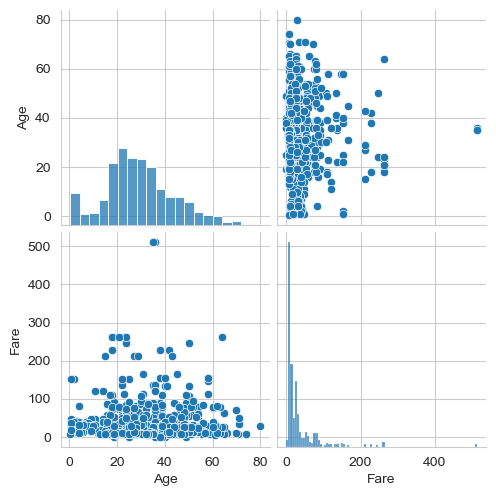

In [32]:
sns.pairplot(corr_df)
plt.show()

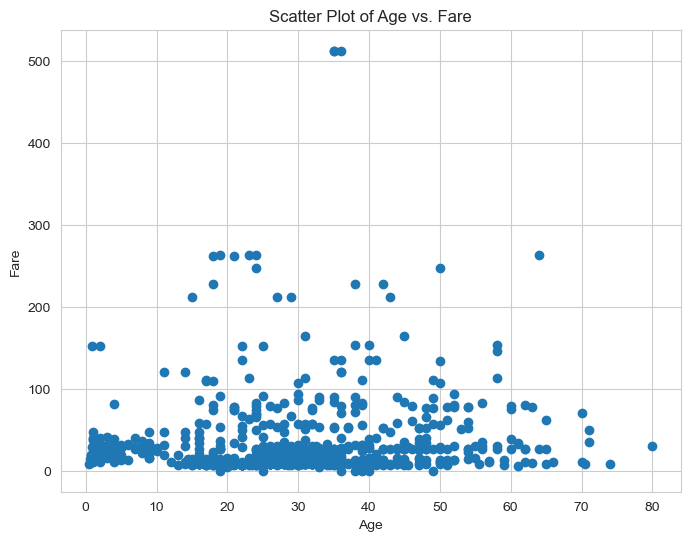

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(corr_df['Age'], corr_df['Fare'])
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [ ]:
# Bonus
survival_by_class = pd.crosstab(df['Pclass'], df['Survived'])

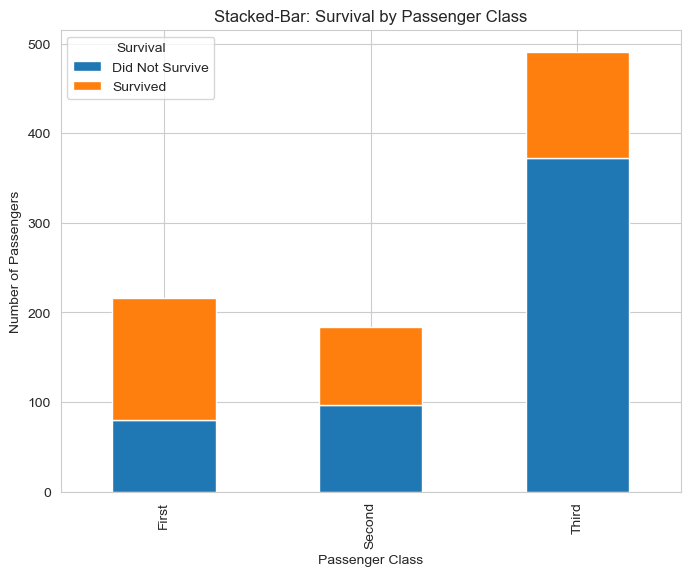

In [35]:
survival_by_class.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Stacked-Bar: Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive', 'Survived'], title='Survival')
plt.show()